# Sentiment Classification and Named Entity Recognition
This notebook provides sentiment classification and named entity recognition project.

Load data

In [1]:
%load_ext autoreload
%autoreload 2

# Use HuggingFace's datasets library to access the financial_phrasebank dataset
from datasets import load_dataset

# Part1: Sentiment Classification

In [2]:
# The financial_phrasebank dataset is available in four variations. It has no predefined train/validation/test splits.
# Each data point was annotated by 5-8 people, then their annotations were combined. 
# Each variation of the dataset contains examples with different levels of agreement. 
# Let's use the one containing all data points where at least 50% of the annotators agreed on the label.
dataset = load_dataset(
    "financial_phrasebank", 
    
    'sentences_50agree' # Select variation of the dataset
)

print(f'The dataset is a dictionary with two splits: \n\n{dataset}')

Reusing dataset financial_phrasebank (/Users/gracepichar/.cache/huggingface/datasets/financial_phrasebank/sentences_50agree/1.0.0/a6d468761d4e0c8ae215c77367e1092bead39deb08fbf4bffd7c0a6991febbf0)


  0%|          | 0/1 [00:00<?, ?it/s]

The dataset is a dictionary with two splits: 

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4846
    })
})


Create a test split

In [3]:
from sklearn.model_selection import train_test_split

# Split test data from training data
train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    dataset["train"]['sentence'], 
    dataset["train"]['label'], 
    test_size=0.2, 
    stratify=dataset["train"]['label']  # make sure the same proportion of labels is in the test set and training set
)

In [4]:
# label 0 = negative, 1 = neutral, 2 = positive
print(f'How many instances in the train dataset? \n\n{len(train_sentences)}')
print('')
print(f'What does one instance look like? \n\n{train_sentences[234]}')

How many instances in the train dataset? 

3876

What does one instance look like? 

Kai Tulonen , Chief Technology Officer , SysOpen Digia says : `` We have been using Corporate Phonebook inside SysOpen Digia extensively since last fall , and we have been very satisfied with the results .


Create a validation dataset 

In [5]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_sentences, train_labels, test_size=0.25, stratify=train_labels)

In [6]:
print(f'How many instances in the validation dataset? \n\n{len(val_sentences)}\n')
print(f'How many instances in the test dataset? \n\n{len(test_sentences)}')

How many instances in the validation dataset? 

969

How many instances in the test dataset? 

970


# 1. Pre-Process data for input

* Create the bag of word

In [7]:
#import the necessary bag of world
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize

* Apply tokenizer to the dataset and create the bag of words

In [19]:
class Tokenizer(object):
    def __call__(self, tweets):
        return word_tokenize(tweets)

vectorizer = CountVectorizer(tokenizer=Tokenizer())
vectorizer.fit(train_sentences)

train_sentences_new = vectorizer.transform(train_sentences)
val_sentences_new = vectorizer.transform(val_sentences)
test_sentences_new = vectorizer.transform(test_sentences)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


# 2. Using Naive Bayes Classifier

In [20]:
from sklearn.naive_bayes import MultinomialNB #import the package for Naive Bayes Classifier

In [21]:
#innitiate the Naive Bayes Classifier classify object
mn = MultinomialNB()

#fit the model
mn.fit(train_sentences_new, train_labels)

#make prediction
y_predict1_val = mn.predict(val_sentences_new)
y_predict1_train = mn.predict(train_sentences_new)
y_predict1_test = mn.predict(test_sentences_new)

# 3. Evalute the model perfomance

* Validation Set

In [22]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = metrics.accuracy_score(val_labels ,y_predict1_val)
print("The accuracy score of validation set: ", accuracy)
precision = metrics.precision_score(val_labels ,y_predict1_val, average = "macro")
print("The precision of validation set:", precision)
f1_score = metrics.f1_score(val_labels ,y_predict1_val, average = "macro")
print("The f1 score of validation set:", f1_score)

print(classification_report(val_labels ,y_predict1_val))

The accuracy score of validation set:  0.7100103199174407
The precision of validation set: 0.6398693475677469
The f1 score of validation set: 0.585524084547785
              precision    recall  f1-score   support

           0       0.54      0.30      0.38       121
           1       0.75      0.90      0.82       576
           2       0.63      0.50      0.56       272

    accuracy                           0.71       969
   macro avg       0.64      0.56      0.59       969
weighted avg       0.69      0.71      0.69       969



* Training set

In [23]:
accuracy = metrics.accuracy_score(train_labels ,y_predict1_train)
print("The accuracy score of train set: ", accuracy)
precision = metrics.precision_score(train_labels ,y_predict1_train, average = "macro")
print("The precision of train set:", precision)
f1_score = metrics.f1_score(train_labels ,y_predict1_train, average = "macro")
print("The f1 score of train set:", f1_score)

print(classification_report(train_labels ,y_predict1_train))

The accuracy score of train set:  0.890608875128999
The precision of train set: 0.8859034776763915
The f1 score of train set: 0.8610837178749406
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       362
           1       0.90      0.94      0.92      1727
           2       0.87      0.84      0.86       818

    accuracy                           0.89      2907
   macro avg       0.89      0.84      0.86      2907
weighted avg       0.89      0.89      0.89      2907



* Test set

In [24]:
accuracy = metrics.accuracy_score(test_labels ,y_predict1_test)
print("The accuracy score of test set: ", accuracy)
precision = metrics.precision_score(test_labels ,y_predict1_test, average = "macro")
print("The precision of test set:", precision)
f1_score = metrics.f1_score(test_labels ,y_predict1_test, average = "macro")
print("The f1 score of test set:", f1_score)

print(classification_report(test_labels ,y_predict1_test))

The accuracy score of test set:  0.7154639175257732
The precision of test set: 0.6536048691312619
The f1 score of test set: 0.6033774431057563
              precision    recall  f1-score   support

           0       0.58      0.34      0.43       121
           1       0.76      0.89      0.82       576
           2       0.62      0.51      0.56       273

    accuracy                           0.72       970
   macro avg       0.65      0.58      0.60       970
weighted avg       0.70      0.72      0.70       970



# 5. Visulaize the Result by Confusion Matrix

* Test set

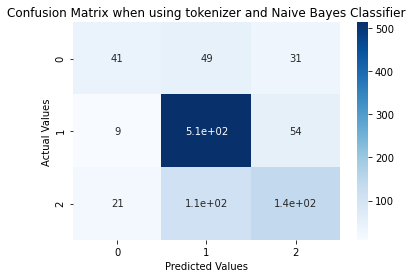

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
cf1 = confusion_matrix(test_labels ,y_predict1_test)
ax = sn.heatmap(cf1, annot=True, cmap='Blues')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix when using tokenizer and Naive Bayes Classifier')
plt.show()

# 6. Using Logistic Regression Classifier

In [26]:
from sklearn.linear_model import LogisticRegression #import pagkage

#innitiate the Logistic Regression Classifier classify object
rgr = LogisticRegression()

#fit the model
rgr.fit(train_sentences_new, train_labels)

#make prediction
y_predict2_val = rgr.predict(val_sentences_new)
y_predict2_train = rgr.predict(train_sentences_new)
y_predict2_test = rgr.predict(test_sentences_new)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Evaluate performance of this model**

* Validation Set

In [27]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = metrics.accuracy_score(val_labels ,y_predict2_val)
print("The accuracy score of validation set: ", accuracy)
precision = metrics.precision_score(val_labels ,y_predict2_val, average = "macro")#depend on the data
print("The precision of validation set:", precision)
f1_score = metrics.f1_score(val_labels ,y_predict2_val, average = "macro")
print("The f1 score of validation set:", f1_score)

print(classification_report(val_labels ,y_predict2_val))

The accuracy score of validation set:  0.7657378740970072
The precision of validation set: 0.756197647171278
The f1 score of validation set: 0.6937059801466581
              precision    recall  f1-score   support

           0       0.77      0.47      0.58       121
           1       0.78      0.90      0.84       576
           2       0.72      0.61      0.66       272

    accuracy                           0.77       969
   macro avg       0.76      0.66      0.69       969
weighted avg       0.76      0.77      0.76       969



* Training Set

In [28]:
accuracy = metrics.accuracy_score(train_labels ,y_predict2_train)
print("The accuracy score of train set: ", accuracy)
precision = metrics.precision_score(train_labels ,y_predict2_train, average = "macro")#depend on the data
print("The precision of train set:", precision)
f1_score = metrics.f1_score(train_labels ,y_predict2_train, average = "macro")
print("The f1 score of train set:", f1_score)

print(classification_report(train_labels ,y_predict2_train))

The accuracy score of train set:  0.9962160302717579
The precision of train set: 0.9974519002837511
The f1 score of train set: 0.9956598610563189
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       362
           1       0.99      1.00      1.00      1727
           2       1.00      0.99      1.00       818

    accuracy                           1.00      2907
   macro avg       1.00      0.99      1.00      2907
weighted avg       1.00      1.00      1.00      2907



* Test set

In [29]:
accuracy = metrics.accuracy_score(test_labels ,y_predict2_test)
print("The accuracy score of test set: ", accuracy)
precision = metrics.precision_score(test_labels ,y_predict2_test, average = "macro")
print("The precision of test set:", precision)
f1_score = metrics.f1_score(test_labels ,y_predict2_test, average = "macro")
print("The f1 score of test set:", f1_score)

print(classification_report(test_labels ,y_predict2_test))

The accuracy score of test set:  0.7670103092783506
The precision of test set: 0.7372308473541649
The f1 score of test set: 0.7009835266141207
              precision    recall  f1-score   support

           0       0.69      0.55      0.61       121
           1       0.79      0.90      0.84       576
           2       0.73      0.59      0.65       273

    accuracy                           0.77       970
   macro avg       0.74      0.68      0.70       970
weighted avg       0.76      0.77      0.76       970



**Visulaize the Result by Confusion Matrix**

* Test Set

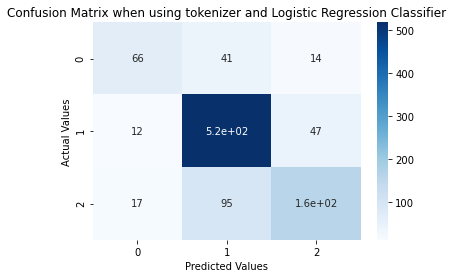

In [32]:
cf2 = confusion_matrix(test_labels ,y_predict2_test)
ax2 = sn.heatmap(cf2, annot=True, cmap='Blues')
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Confusion Matrix when using tokenizer and Logistic Regression Classifier')
plt.show()

# 7. Using Lemmatization

In [20]:
! pip install nltk

You should consider upgrading via the '/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [21]:
import nltk

In [22]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/gracepichar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

* Apply Lemmatization

In [50]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

class LemmaTokenizer(object):
    
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        
    def __call__(self, tweets):
        return [self.wnl.lemmatize(self.wnl.lemmatize(self.wnl.lemmatize(tok, pos='n'), pos='v'), pos='a') for tok in word_tokenize(tweets)]
    

In [51]:
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())

vectorizer.fit(train_sentences)

train_sentences_new = vectorizer.transform(train_sentences)
val_sentences_new = vectorizer.transform(val_sentences)
test_sentences_new = vectorizer.transform(test_sentences)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [52]:
#fit the model
rgr.fit(train_sentences_new, train_labels)

#make prediction
y_predict3_val = rgr.predict(val_sentences_new)
y_predict3_train = rgr.predict(train_sentences_new)
y_predict3_test = rgr.predict(test_sentences_new)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Evaluate the performance of model**

* Validation Set

In [55]:
accuracy = metrics.accuracy_score(val_labels, y_predict3_val)
print("The accuracy score of validation set: ", accuracy)
precision = metrics.precision_score(val_labels, y_predict3_val, average = "macro")#depend on the data
print("The precision of validation set:", precision)
f1_score = metrics.f1_score(val_labels, y_predict3_val, average = "macro")
print("The f1 score of validation set:", f1_score)
print(classification_report(val_labels , y_predict3_val))

The accuracy score of validation set:  0.7554179566563467
The precision of validation set: 0.7358854924793788
The f1 score of validation set: 0.6958009635769707
              precision    recall  f1-score   support

           0       0.73      0.55      0.63       121
           1       0.78      0.88      0.83       576
           2       0.69      0.58      0.63       272

    accuracy                           0.76       969
   macro avg       0.74      0.67      0.70       969
weighted avg       0.75      0.76      0.75       969



* Training Set

In [56]:
accuracy = metrics.accuracy_score(train_labels ,y_predict3_train)
print("The accuracy score of train set: ", accuracy)
precision = metrics.precision_score(train_labels ,y_predict3_train, average = "macro")#depend on the data
print("The precision of train set:", precision)
f1_score = metrics.f1_score(train_labels ,y_predict3_train, average = "macro")
print("The f1 score of train set:", f1_score)

print(classification_report(train_labels, y_predict3_train))

The accuracy score of train set:  0.9934640522875817
The precision of train set: 0.9951843750068309
The f1 score of train set: 0.9935060544578249
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       362
           1       0.99      1.00      0.99      1727
           2       1.00      0.98      0.99       818

    accuracy                           0.99      2907
   macro avg       1.00      0.99      0.99      2907
weighted avg       0.99      0.99      0.99      2907



* Test Set

In [57]:
accuracy = metrics.accuracy_score(test_labels ,y_predict3_test)
print("The accuracy score of test set: ", accuracy)
precision = metrics.precision_score(test_labels ,y_predict3_test, average = "macro")
print("The precision of test set:", precision)
f1_score = metrics.f1_score(test_labels ,y_predict3_test, average = "macro")
print("The f1 score of test set:", f1_score)

print(classification_report(test_labels ,y_predict3_test))

The accuracy score of test set:  0.7701030927835052
The precision of test set: 0.7424285059327772
The f1 score of test set: 0.7097255721108932
              precision    recall  f1-score   support

           0       0.70      0.56      0.62       121
           1       0.79      0.89      0.84       576
           2       0.73      0.61      0.67       273

    accuracy                           0.77       970
   macro avg       0.74      0.69      0.71       970
weighted avg       0.76      0.77      0.76       970



**Visulaize the Result by Confusion Matrix**

* Test Set

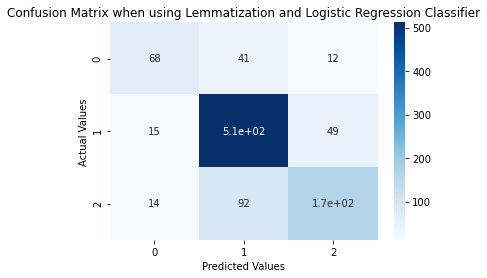

In [59]:
cf3 = confusion_matrix(test_labels ,y_predict3_test)
ax3 = sn.heatmap(cf3, annot=True, cmap='Blues')
ax3.set_xlabel('Predicted Values')
ax3.set_ylabel('Actual Values')
ax3.set_title('Confusion Matrix when using Lemmatization and Logistic Regression Classifier')
plt.show()

# 8. Use Lemmatization and N-grams

* Apply Lemmatization and bi-grams

In [60]:
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(), ngram_range=(2,2))

vectorizer.fit(train_sentences)

train_sentences_new = vectorizer.transform(train_sentences)
val_sentences_new = vectorizer.transform(val_sentences)
test_sentences_new = vectorizer.transform(test_sentences)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


* apply Logistic Regression Classifier model

In [61]:
#fit the model
rgr.fit(train_sentences_new, train_labels)

#make prediction with Logistic Regression Classifier
y_predict4_val = rgr.predict(val_sentences_new)
y_predict4_train = rgr.predict(train_sentences_new)
y_predict4_test = rgr.predict(test_sentences_new)

**Evaluate performance of this model**

* Validation Set

In [62]:
accuracy = metrics.accuracy_score(val_labels, y_predict4_val)
print("The accuracy score of validation set: ", accuracy)
precision = metrics.precision_score(val_labels, y_predict4_val, average = "macro")#depend on the data
print("The precision of validation set:", precision)
f1_score = metrics.f1_score(val_labels, y_predict4_val, average = "macro")
print("The f1 score of validation set:", f1_score)
print(classification_report(val_labels ,y_predict4_val))

The accuracy score of validation set:  0.7337461300309598
The precision of validation set: 0.7583170716354021
The f1 score of validation set: 0.6163993143339098
              precision    recall  f1-score   support

           0       0.81      0.32      0.46       121
           1       0.73      0.95      0.83       576
           2       0.73      0.46      0.56       272

    accuracy                           0.73       969
   macro avg       0.76      0.58      0.62       969
weighted avg       0.74      0.73      0.71       969



* Training Set

In [63]:
accuracy = metrics.accuracy_score(train_labels, y_predict4_train)
print("The accuracy score of train set: ", accuracy)
precision = metrics.precision_score(train_labels, y_predict4_train, average = "macro")#depend on the data
print("The precision of train set:", precision)
f1_score = metrics.f1_score(train_labels, y_predict4_train, average = "macro")
print("The f1 score of train set:", f1_score)

print(classification_report(train_labels, y_predict4_train))

The accuracy score of train set:  0.999656002751978
The precision of train set: 0.9998070987654321
The f1 score of train set: 0.9996996478681046
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       362
           1       1.00      1.00      1.00      1727
           2       1.00      1.00      1.00       818

    accuracy                           1.00      2907
   macro avg       1.00      1.00      1.00      2907
weighted avg       1.00      1.00      1.00      2907



* Test Set

In [64]:
accuracy = metrics.accuracy_score(test_labels ,y_predict4_test)
print("The accuracy score of test set: ", accuracy)
precision = metrics.precision_score(test_labels ,y_predict4_test, average = "macro")
print("The precision of test set:", precision)
f1_score = metrics.f1_score(test_labels ,y_predict4_test, average = "macro")
print("The f1 score of test set:", f1_score)

print(classification_report(test_labels ,y_predict4_test))

The accuracy score of test set:  0.7360824742268042
The precision of test set: 0.7343711244867802
The f1 score of test set: 0.6231840929447342
              precision    recall  f1-score   support

           0       0.73      0.36      0.48       121
           1       0.74      0.95      0.83       576
           2       0.74      0.45      0.56       273

    accuracy                           0.74       970
   macro avg       0.73      0.59      0.62       970
weighted avg       0.74      0.74      0.71       970



**Visulaize the Result by Confusion Matrix**

* Test Set

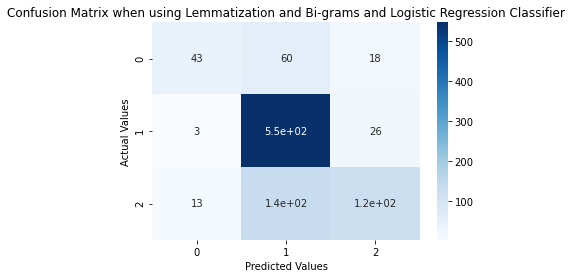

In [65]:
cf4 = confusion_matrix(test_labels ,y_predict4_test)
ax4 = sn.heatmap(cf4, annot=True, cmap='Blues')
ax4.set_xlabel('Predicted Values')
ax4.set_ylabel('Actual Values')
ax4.set_title('Confusion Matrix when using Lemmatization and Bi-grams and Logistic Regression Classifier')
plt.show()

# Part2 : Named Entity Recognition


Load [HuggingFace](https://huggingface.co/datasets/conll2003) dataset

In [164]:
import re
import numpy as np

def read_sec_filings(split):
    # Use this function to load the SEC filings data from text files
    
    if split == 'train':
        with open('./data/SEC-filings/train/FIN5.txt', encoding='utf-8') as fp:
            lines = fp.readlines()
    else:
        with open('./data/SEC-filings/test/FIN3.txt', encoding='utf-8') as fp:
            lines = fp.readlines()
   
    # store the tokens and labels for all sentences
    sentences = []
    labels = []

    # the tokens and labels for the current sentence
    current_sen = []
    current_labels = []

    for i in range(2, len(lines)):
        # print(f'This is line {i}')
        # print(lines[i])

        if len(lines[i]) > 1:  # Line with some data on: The data consists of tokens and tags.
            data = re.split(' ', lines[i])  # tokenise the line
            # print(data)
            current_sen.append(data[0])  # append the token 
            
            # data[1] contains POS tags -- you can also use these in your model.
            
            current_labels.append(data[3].strip())  # append the NER tag
        elif len(current_sen) > 1:  # this marks the end of a sentence
            # end of sentence
            sentences.append(current_sen)  # save the tokens for this sentence
            current_sen = []  # reset

            labels.append(current_labels)  # save the tags for this sentence
            current_labels = []

    if len(current_sen) > 1:  # save the last sentence
        sentences.append(current_sen)
        labels.append(current_labels)
    
    print(f'Number of sentences loaded = {len(sentences)}')
    print(f'Number of unique labels: {np.unique(np.concatenate(labels))}')
                                      
    return sentences, labels

In [165]:
from sklearn.model_selection import train_test_split

print('Loading the original training set: ')
sentences_ner, labels_ner = read_sec_filings('train')

print('\nLoading the test set: ')
test_sentences_ner, test_labels_ner = read_sec_filings('test')

Loading the original training set: 
Number of sentences loaded = 1152
Number of unique labels: ['I-LOC' 'I-MISC' 'I-ORG' 'I-PER' 'O']

Loading the test set: 
Number of sentences loaded = 303
Number of unique labels: ['I-LOC' 'I-MISC' 'I-ORG' 'I-PER' 'O']


Created a validation split from the training set

In [166]:
train_sentences_ner, val_sentences_ner, train_labels_ner, val_labels_ner = train_test_split(
    sentences_ner, 
    labels_ner, 
    test_size=0.2,
    # stratify=labels_ner  # there are too few examples of some classes to stratify
)

print(f'Number of training sentences = {len(train_sentences_ner)}')
print(f'Number of validation sentences = {len(val_sentences_ner)}')

Number of training sentences = 921
Number of validation sentences = 231


Map the tag types with each word in differnt dataset to evaluate the performance of model

In [167]:
train_set = [list(zip(train_sentences_ner[i], train_labels_ner[i])) for i in range(len(train_sentences_ner))]
val_set = [list(zip(val_sentences_ner[i], val_labels_ner[i])) for i in range(len(val_sentences_ner))]
test_set = [list(zip(test_sentences_ner[i], test_labels_ner[i])) for i in range(len(test_sentences_ner))]

# 1. Using CRF

In [82]:
!conda install -c conda-forge python-crfsuite -y

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::spyder-kernels==1.10.2=py38hecd8cb5_0
  - defaults/noarch::jupyterlab==3.0.14=pyhd3eb1b0_1
  - defaults/noarch::python-language-server==0.36.2=pyhd3eb1b0_0
  - defaults/osx-64::bokeh==2.3.2=py38hecd8cb5_0
  - defaults/osx-64::zope.event==4.5.0=py38_0
  - defaults/osx-64::matplotlib==3.3.4=py38hecd8cb5_0
  - defaults/noarch::jsonschema==3.2.0=py_2
  - defaults/noarch::importlib_metadata==3.10.0=hd3eb1b0_0
  - defaults/noarch::pyls-spyder==0.3.2=pyhd3eb1b0_0
  - defaults/noarch::pygments==2.8.1=pyhd3eb1b0_0
  - defaults/osx-64::scikit-learn==0.24.1=py38hb2f4e1b_0
  - defaults/osx-64::ipython==7.22.0=py38h01d92e1_0
  - defaults/noarch::baycomp==1.0.2=py_1
  - defaults/noarch::jupyterlab_server==2.4.0=pyhd3eb1b0_0
  - defaults/osx-64::scikit-image==0.18.1=py38hb2f4e1b_0
  - defaults/osx-64::distributed==2021.4.0=py38hec

done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - python-crfsuite


The following NEW packages will be INSTALLED:

  _anaconda_depends  pkgs/main/osx-64::_anaconda_depends-2020.07-py38_0
  fsspec             conda-forge/noarch::fsspec-2022.3.0-pyhd8ed1ab_0
  importlib-metadata conda-forge/osx-64::importlib-metadata-3.10.0-py38h50d1736_0
  libllvm9           conda-forge/osx-64::libllvm9-9.0.1-h7475705_1
  nltk               conda-forge/noarch::nltk-3.6.7-pyhd8ed1ab_0
  pandas             conda-forge/osx-64::pandas-1.0.5-py38h5fc983b_0
  pathtools          conda-forge/noarch::pathtools-0.1.2-py_1
  pip                conda-forge/noarch::pip-22.0.4-pyhd8ed1ab_0
  python-crfsuite    conda-forge/osx-64::python-crfsuite-0.9.7-py38ha0d09dd_0
  python_abi         cond

**Implement model**

In [168]:
import nltk

# Train a CRF NER tagger
def train_CRF_NER_tagger(train_set):
    tagger = nltk.tag.CRFTagger()
    tagger.train(train_set, 'model.crf.tagger')
    return tagger  # return the trained model

tagger = train_CRF_NER_tagger(train_set)

**Predict with the tag with val_set**

In [169]:
predicted_tags1 = tagger.tag_sents(val_sentences_ner)

In [170]:
predicted_tags1 #the result of CRF model

[[('"', 'O'),
  ('Account', 'O'),
  ('Debtor', 'O'),
  ('"', 'O'),
  ('is', 'O'),
  ('any', 'O'),
  ('"', 'O'),
  ('account', 'O'),
  ('debtor', 'O'),
  ('"', 'O'),
  ('as', 'O'),
  ('defined', 'O'),
  ('in', 'O'),
  ('the', 'O'),
  ('Code', 'O'),
  ('with', 'O'),
  ('such', 'O'),
  ('additions', 'O'),
  ('to', 'O'),
  ('such', 'O'),
  ('term', 'O'),
  ('as', 'O'),
  ('may', 'O'),
  ('hereafter', 'O'),
  ('be', 'O'),
  ('made', 'O'),
  ('.', 'O')],
 [('The', 'O'),
  ('rotary', 'O'),
  ('dumper', 'O'),
  ('and', 'O'),
  ('the', 'O'),
  ('receiving', 'O'),
  ('hopper', 'O'),
  ('vibrating', 'O'),
  ('feeders', 'O'),
  ('have', 'O'),
  ('a', 'O'),
  ('separate', 'O'),
  ('control', 'O'),
  ('panel', 'O'),
  ('located', 'O'),
  ('in', 'O'),
  ('the', 'O'),
  ('dumper', 'O'),
  ('building', 'O'),
  ('.', 'O')],
 [('If', 'O'),
  ('the', 'O'),
  ('Term', 'O'),
  ('Loans', 'O'),
  ('are', 'O'),
  ('accelerated', 'O'),
  ('following', 'O'),
  ('the', 'O'),
  ('occurrence', 'O'),
  ('of', 'O'),


**Explore the tag types in predicted_tags (the result from model)**

In [171]:
tag_types = [] #create list to store tag
for sent in predicted_tags1: #Extract each tweet
    for j in sent: #Extract each word
        tag_types.append(j[1]) #Extract each tag

In [172]:
np.unique(tag_types) #the tag types in the predicted set

array(['I-LOC', 'I-ORG', 'I-PER', 'O'], dtype='<U5')

**Evaluate performance**

In [173]:
def extract_spans(tagged_sents):
    
    spans = {}
        
    for sidx, sent in enumerate(tagged_sents):
        start = -1
        entity_type = None
        for i, (tok, lab) in enumerate(sent):
            if 'I-' in lab:
                start = i
                end = i + 1
                entity_type = lab[2:]
            elif lab == 'O' and start >= 0:
                
                if entity_type not in spans:
                    spans[entity_type] = []
                
                spans[entity_type].append((start, end, sidx))
                start = -1
                
    return spans


def cal_span_level_f1(test_sents, test_sents_with_pred):
    # get a list of spans from the test set labels
    gold_spans = extract_spans(test_sents)
   
    # get a list of spans predicted by our tagger
    pred_spans = extract_spans(test_sents_with_pred)
    #from the pred_spans, they don't have a MISC
    
    # compute the metrics for each class:
    f1_per_class = []
    
    ne_types = gold_spans.keys()  # get the list of named entity types (not the tags)
  
    for ne_type in ne_types:
        # compute the confusion matrix
        true_pos = 0
        false_pos = 0
        
      
        for tag in pred_spans.keys(): #Extract the tag types from pred_spans
            if tag != "MISC": # the tag must not be MISC 
                span = pred_spans[tag] #extract span for each types of pred_spans
                for i in span: #extract each span
                    if i in gold_spans[ne_type]: #compare it in gold_spans
                        true_pos += 1
                    else:
                        false_pos += 1
                    
        false_neg = 0

        for tag in gold_spans.keys(): #Extract the tag types from gold_spans
            if tag == "MISC": # MISC tag
                false_neg += 1 #increase the false_neg
            elif tag != "MISC": #the tag must not be MISC 
                span = gold_spans[ne_type]#extract span for each types of gold_spans
                for i in span: #extract each span
                    if i not in pred_spans[tag]: #compare it in gold_spans
                        false_neg += 1
                
        if true_pos + false_pos == 0:
            precision = 0
        else:
            precision = true_pos / float(true_pos + false_pos)
            
        if true_pos + false_neg == 0:
            recall = 0
        else:
            recall = true_pos / float(true_pos + false_neg)
        
        if precision + recall == 0:
            f1 = 0
        else:
            f1 = 2 * precision * recall / (precision + recall)
            
        f1_per_class.append(f1)
        print(f'F1 score for class {ne_type} = {f1}')
        
    
    print(f'Macro-average f1 score = {np.mean(f1_per_class)}')


* Validation Set

In [174]:
cal_span_level_f1(val_set, predicted_tags1)

F1 score for class PER = 0.4317343173431734
F1 score for class LOC = 0.07999999999999999
F1 score for class ORG = 0.22651933701657462
F1 score for class MISC = 0
Macro-average f1 score = 0.184563413589937


* Training Set

In [175]:
predicted_tags1_train = tagger.tag_sents(train_sentences_ner)
cal_span_level_f1(train_set, predicted_tags1_train)

F1 score for class PER = 0.448948948948949
F1 score for class ORG = 0.21476510067114093
F1 score for class LOC = 0.116751269035533
F1 score for class MISC = 0
Macro-average f1 score = 0.19511632966390574


* Test Set

In [176]:
predicted_tags1_test = tagger.tag_sents(test_sentences_ner)
cal_span_level_f1(test_set, predicted_tags1_test)

F1 score for class ORG = 0.08395061728395062
F1 score for class PER = 0.44217687074829937
F1 score for class LOC = 0.028735632183908042
F1 score for class MISC = 0
Macro-average f1 score = 0.1387157800540395


# 2. Using CRF and add some feature

In [177]:
import re, unicodedata

class CustomCRFTagger(nltk.tag.CRFTagger):
    _current_tokens = None
    
    def _get_features(self, tokens, idx):
            
            token = tokens[idx]
            
            feature_list = []
            
            if not token:
                return feature_list

            # Capitalization
            if token[0].isupper():
                feature_list.append("CAPITALIZATION")

            # Number
            if re.search(self._pattern, token) is not None:
                feature_list.append("HAS_NUM")

            # Punctuation
            punc_cat = {"Pc", "Pd", "Ps", "Pe", "Pi", "Pf", "Po"}
            if all(unicodedata.category(x) in punc_cat for x in token):
                feature_list.append("PUNCTUATION")

            # Suffix up to length 3
            if len(token) > 1:
                feature_list.append("SUF_" + token[-1:])
            if len(token) > 2:
                feature_list.append("SUF_" + token[-2:])
            if len(token) > 3:
                feature_list.append("SUF_" + token[-3:])

                
            # Current word
            feature_list.append("WORD_" + token)
            
            ### WRITE YOUR OWN CODE HERE ###
            if idx > 0:
                feature_list.append("PREVWORD_" + tokens[idx-1])
            if idx < len(tokens)-1:
                feature_list.append("NEXTWORD_" + tokens[idx+1])
            ####

            return feature_list
                

In [178]:
def train_CustomCRF_NER_tagger(train_set):
    tagger = CustomCRFTagger()
    tagger.train(train_set, 'model.crf.tagger')
    return tagger  # return the trained model

tagger2 = train_CustomCRF_NER_tagger(train_set)

* Validation set

In [179]:
predicted_tags2 = tagger2.tag_sents(val_sentences_ner)
cal_span_level_f1(val_set, predicted_tags2)

F1 score for class PER = 0.4254545454545455
F1 score for class LOC = 0.13427561837455831
F1 score for class ORG = 0.22702702702702704
F1 score for class MISC = 0
Macro-average f1 score = 0.1966892977140327


* Training Set

In [180]:
predicted_tags2_train = tagger2.tag_sents(train_sentences_ner)
cal_span_level_f1(train_set, predicted_tags2_train)

F1 score for class PER = 0.44758364312267657
F1 score for class ORG = 0.21653255303584493
F1 score for class LOC = 0.1423841059602649
F1 score for class MISC = 0
Macro-average f1 score = 0.2016250755296966


* Test Set

In [181]:
predicted_tags2_test = tagger2.tag_sents(test_sentences_ner)
cal_span_level_f1(test_set, predicted_tags2_test)

F1 score for class ORG = 0.0851063829787234
F1 score for class PER = 0.4355555555555556
F1 score for class LOC = 0.0546448087431694
F1 score for class MISC = 0
Macro-average f1 score = 0.1438266868193621


# 3. Using POS and CRF

In [182]:
class CRFTaggerWithPOS(CustomCRFTagger):
    _current_tokens = None
    
    def _get_features(self, tokens, index):
       
        basic_features = super()._get_features(tokens, index)
        
        # Get the pos tags for the current sentence and save it
        if tokens != self._current_tokens:
            self._pos_tagged_tokens = nltk.pos_tag(tokens)
            self._current_tokens = tokens
            
            
        ### WRITE YOUR OWN CODE HERE
        basic_features.append(self._pos_tagged_tokens[index][1])
        ###
        
        return basic_features

In [183]:
# Train a CRF NER tagger
def train_CRF_NER_tagger_with_POS(train_set):
    tagger = CRFTaggerWithPOS()
    tagger.train(train_set, 'model.crf.tagger')
    return tagger  # return the trained model

tagger3 = train_CRF_NER_tagger_with_POS(train_set)

* Validation Set

In [184]:
predicted_tags3 = tagger3.tag_sents(val_sentences_ner)
cal_span_level_f1(val_set, predicted_tags3)

F1 score for class PER = 0.4254545454545455
F1 score for class LOC = 0.13427561837455831
F1 score for class ORG = 0.22702702702702704
F1 score for class MISC = 0
Macro-average f1 score = 0.1966892977140327


* Training Set

In [185]:
predicted_tags3_train = tagger3.tag_sents(train_sentences_ner)
cal_span_level_f1(train_set, predicted_tags3_train)

F1 score for class PER = 0.4496296296296297
F1 score for class ORG = 0.21786492374727667
F1 score for class LOC = 0.14614121510673236
F1 score for class MISC = 0
Macro-average f1 score = 0.20340894212090968


* Test Set

In [186]:
predicted_tags3_test = tagger3.tag_sents(test_sentences_ner)
cal_span_level_f1(test_set, predicted_tags3_test)

F1 score for class ORG = 0.07888631090487239
F1 score for class PER = 0.43392070484581496
F1 score for class LOC = 0.06417112299465241
F1 score for class MISC = 0
Macro-average f1 score = 0.14424453468633494


# Part 3: Perform the trained NEG tagger to the Financial Phrasebank dataset

## 1. Using Tokenisation

**Extract the train sentencnce from dataset**

In [289]:
sentences = dataset["train"]['sentence']

In [290]:
sentences#see the result

['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .',
 'Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .',
 'The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .',
 'With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .',
 "According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",
 "FINANCING OF ASPOCO

In [291]:
sentences[0] #print out the sentence index0

'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'

**Using Tokenisation to seperate the word**

In [292]:
tokenized_sents = [] #create list to store token

#apply tokenisation in each tweet
for sent in sentences:
    tokens = nltk.word_tokenize(sent)
    tokenized_sents.append(tokens)

print(tokenized_sents)

[['According', 'to', 'Gran', ',', 'the', 'company', 'has', 'no', 'plans', 'to', 'move', 'all', 'production', 'to', 'Russia', ',', 'although', 'that', 'is', 'where', 'the', 'company', 'is', 'growing', '.'], ['Technopolis', 'plans', 'to', 'develop', 'in', 'stages', 'an', 'area', 'of', 'no', 'less', 'than', '100,000', 'square', 'meters', 'in', 'order', 'to', 'host', 'companies', 'working', 'in', 'computer', 'technologies', 'and', 'telecommunications', ',', 'the', 'statement', 'said', '.'], ['The', 'international', 'electronic', 'industry', 'company', 'Elcoteq', 'has', 'laid', 'off', 'tens', 'of', 'employees', 'from', 'its', 'Tallinn', 'facility', ';', 'contrary', 'to', 'earlier', 'layoffs', 'the', 'company', 'contracted', 'the', 'ranks', 'of', 'its', 'office', 'workers', ',', 'the', 'daily', 'Postimees', 'reported', '.'], ['With', 'the', 'new', 'production', 'plant', 'the', 'company', 'would', 'increase', 'its', 'capacity', 'to', 'meet', 'the', 'expected', 'increase', 'in', 'demand', 'and

## 2. Apply CRF model with POS (tagger3 from the previous section)

In [293]:
predicted_tags_sentimet = tagger3.tag_sents(tokenized_sents)

In [294]:
predicted_tags_sentimet #see the result from model

[[('According', 'O'),
  ('to', 'O'),
  ('Gran', 'O'),
  (',', 'O'),
  ('the', 'O'),
  ('company', 'O'),
  ('has', 'O'),
  ('no', 'O'),
  ('plans', 'O'),
  ('to', 'O'),
  ('move', 'O'),
  ('all', 'O'),
  ('production', 'O'),
  ('to', 'O'),
  ('Russia', 'I-LOC'),
  (',', 'O'),
  ('although', 'O'),
  ('that', 'O'),
  ('is', 'O'),
  ('where', 'O'),
  ('the', 'O'),
  ('company', 'O'),
  ('is', 'O'),
  ('growing', 'O'),
  ('.', 'O')],
 [('Technopolis', 'O'),
  ('plans', 'O'),
  ('to', 'O'),
  ('develop', 'O'),
  ('in', 'O'),
  ('stages', 'O'),
  ('an', 'O'),
  ('area', 'O'),
  ('of', 'O'),
  ('no', 'O'),
  ('less', 'O'),
  ('than', 'O'),
  ('100,000', 'O'),
  ('square', 'O'),
  ('meters', 'O'),
  ('in', 'O'),
  ('order', 'O'),
  ('to', 'O'),
  ('host', 'O'),
  ('companies', 'O'),
  ('working', 'O'),
  ('in', 'O'),
  ('computer', 'O'),
  ('technologies', 'O'),
  ('and', 'O'),
  ('telecommunications', 'O'),
  (',', 'O'),
  ('the', 'O'),
  ('statement', 'O'),
  ('said', 'O'),
  ('.', 'O')],
 [(

**Extract the tag from the prediced set**

In [295]:
tag = [] #create liset to store tag
#Extracct tag from each word
for sent in predicted_tags_sentimet:
    for j in sent:
        tag.append(j[1])

In [296]:
np.unique(tag) #the tag in the prediced set

array(['I-LOC', 'I-MISC', 'I-ORG', 'I-PER', 'O'], dtype='<U6')

## 3. Calculate negative and positive class

**compute the sentimental score (the number of positive text - the number of negative)**

### 3.1 ORG

**Extract word with the ORG tag**

In [297]:
#create list to store word with org
org = [[] for _ in range(len(predicted_tags_sentimet))] 
#Extract word with the ORG tag
for index in range(len(predicted_tags_sentimet)): #ilterate thorough the prediced set
    for word in predicted_tags_sentimet[index]: #extect each word
        if word[1] == 'I-ORG': #if word with tag org
            org[index].append(word[0]) #append word to org list

In [298]:
org #see the result

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Aspo', 'Plc', 'STOCK'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Bank'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['KESKO', 'CORPORATION', 'STOCK'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Bank'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Finnish', 'Bank'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['The', 'bank'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Finnish', 'Metso', 'Minerals'],
 [],
 ['Finnish', 'Bank'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []

**Map the org list which contain word with the class label to be the score**

In [299]:
new_org = [list(zip(org, dataset["train"]['label']))]

In [300]:
new_org #see the result

[[([], 1),
  ([], 1),
  ([], 0),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  (['Aspo', 'Plc', 'STOCK'], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  (['Bank'], 2),
  ([], 2),
  ([], 2),
  ([], 2),
  ([], 1),
  ([], 1),
  ([], 1),
  ([], 1),
  ([], 1),
  ([], 2),
  ([], 1),
  (['KESKO', 'CORPORATION', 'STOCK'], 2),
  ([], 2),
  ([], 1),
  ([], 2),
  ([], 1),
  ([], 2),
  ([], 1),
  ([], 1),
  ([], 1),
  (['Bank'], 1),
  ([], 1),
  ([], 1),
  ([], 2),
  ([], 1),
  ([], 2),
  ([], 1),
  ([], 1),
  ([], 1),
  ([], 2),
  ([], 2),


**Calculate the setimetal score**

In [301]:
postive = [] #create the list to store the postive score
negative = [] #create the list to store the negative score
netual = [] #create the list to store the netual score

#Calculate the setimetal score for each class
for index in range(len(new_org)): #literate in the word with score
    for sent in new_org[index]: #extract each word 
        if len(sent[0]) > 0:#if it have a word in the list
            if sent[1] == 2: #if score = 2 is postive 
                postive.append(len(sent[0]))#append the counting word
            elif sent[1] == 0: #if score = 0 is negative
                negative.append(len(sent[0]))#append the counting word
            elif sent[1] == 1: #if score = 1 is netual
                netual.append(len(sent[0]))#append the counting word
# sum of all score in each class
total_postitive = np.sum(postive)
total_negative = np.sum(negative)
total_netual = np.sum(netual)
#Calculate the setimetal score by total_postitive - total_negative 
score_org = total_postitive - total_negative 

In [302]:
print("The total sentiment score of ORG :", score_org)

The total sentiment score of ORG : 136


#### The top five of positive and negative for ORG

**positive**

In [303]:
top_pos = np.sort(postive) #sort the score of positive class in each sentence
top_pos

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  8,
       10, 10])

In [304]:
top_pos_org = np.argsort(postive)[::-1][:5] #sort in the descending order and pick up index of top five score

In [305]:
top_pos_org #result of index top five for sentence

array([47, 12, 64, 22, 13])

In [306]:
print("The top five of positive ORG and the score of this sentence\n")
for index in top_pos_org: #use the index from previous block to print the sentence with top five score in positive
    print("positive score:", postive[index])
    print("Sentence: " + sentences[index] + "\n")

The top five of positive ORG and the score of this sentence

positive score: 10
Sentence: The agreement was signed with Biohit Healthcare Ltd , the UK-based subsidiary of Biohit Oyj , a Finnish public company which develops , manufactures and markets liquid handling products and diagnostic test systems .

positive score: 10
Sentence: A purchase agreement for 7,200 tons of gasoline with delivery at the Hamina terminal , Finland , was signed with Neste Oil OYj at the average Platts index for this September plus eight US dollars per month .

positive score: 8
Sentence: In June it sold a 30 percent stake to Nordstjernan , and the investment group has now taken up the option to acquire EQT 's remaining shares .

positive score: 6
Sentence: MegaFon 's subscriber base increased 16.1 % in 2009 to 50.5 million users as of December 31 , while its market share by the number of customers amounted to 24 % as of late 2009 , up from 23 % as of late 2008 , according to TeliaSonera estimates .

positiv

**negative**

In [307]:
top_neg = np.sort(negative) #sort the score of negative class in each sentence
top_neg 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 5, 6, 8])

In [308]:
top_neg_org = np.argsort(negative)[::-1][:5] #sort in the descending order and pick up index of top five score in negative
top_neg_org 

array([ 9,  5, 14,  2,  7])

In [309]:
print("The top five of negative ORG and the score of this sentence\n")
for index in top_neg_org: #use the index from previous block to print the sentence with top five score in positive
    print("negative score:", negative[index])
    print("Sentence: " + sentences[index] + "\n")

The top five of negative ORG and the score of this sentence

negative score: 8
Sentence: Operating profit totalled EUR 21.1 mn , up from EUR 18.6 mn in 2007 , representing 9.7 % of net sales .

negative score: 6
Sentence: FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .

negative score: 5
Sentence: Clothing retail chain Sepp+ñl+ñ 's sales increased by 8 % to EUR 155.2 mn , and operating profit rose to EUR 31.1 mn from EUR 17.1 mn in 2004 .

negative score: 4
Sentence: The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .

negative score: 4
Sentence: In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn .



## 3.2 LOC, PER, MISC

**It use the same code as previous section but extract differnt tag types**

**LOC**

In [326]:
#create list to store word with LOC
loc = [[] for _ in range(len(predicted_tags_sentimet))] 
#Extract word with the LOC tag
for index in range(len(predicted_tags_sentimet)): #ilterate thorough the prediced set
    for word in predicted_tags_sentimet[index]: #extect each word
        if word[1] == 'I-LOC': #if word with tag LOC
            loc[index].append(word[0]) #append word to LOc list

            
#Map the loc list which contain word with the class label to be the score            
new_loc = [list(zip(loc, dataset["train"]['label']))]

postive = [] #create the list to store the postive score
negative = [] #create the list to store the negative score
netual = [] #create the list to store the netual score

#Calculate the setimetal score for each class
for index in range(len(new_loc)): #literate in the word with score
    for sent in new_loc[index]: #extract each word 
        if len(sent[0]) > 0:#if it have a word in the list
            if sent[1] == 2: #if score = 2 is postive 
                postive.append(len(sent[0]))#append the counting word
            elif sent[1] == 0: #if score = 0 is negative
                negative.append(len(sent[0]))#append the counting word
            elif sent[1] == 1: #if score = 1 is netual
                netual.append(len(sent[0]))#append the counting word
                
# sum of all score in each class
total_postitive = np.sum(postive)
total_negative = np.sum(negative)
total_netual = np.sum(netual)
#Calculate the setimetal score by total_postitive - total_negative 
score_loc = total_postitive - total_negative 
print("The total sentiment score of LOC :", score_loc)
print(" ")

#find the index with contain top five score
top_pos_loc = np.argsort(postive)[::-1][:5]
top_neg_loc = np.argsort(negative)[::-1][:5]

#print out the result
print("The top five of positive LOC and the score of this sentence\n")
for index in top_pos_loc: #use the index from previous block to print the sentence with top five score in positive
    print("positive score:", postive[index])
    print("Sentence: " + sentences[index] + "\n")
    
print("The top five of negative LOC and the score of this sentence\n")
for index in top_neg_loc: #use the index from previous block to print the sentence with top five score in positive
    print("negative score:", negative[index])
    print("Sentence: " + sentences[index] + "\n")

The total sentiment score of LOC : 406
 
The top five of positive LOC and the score of this sentence

positive score: 19
Sentence: Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales .

positive score: 9
Sentence: At the request of Finnish media company Alma Media 's newspapers , research manager Jari Kaivo-oja at the Finland Futures Research Centre at the Turku School of Economics has drawn up a future scenario for Finland 's national economy by using a model developed by the University of Denver .

positive score: 9
Sentence: Finnish KCI Konecranes has raised its net sales growth estimate for 2006 from over 25 % to over 35 % .

positive score: 8
Sentence: Viking Line 's cargo revenue increased by 5.4 % to EUR 21.46 mn , and cargo volume increased by 2.4 % to 70,116 cargo units .

positive score: 7
Sentence: The new plant is planned to have an electricity generation capacity of up to 350 megawatts ( MW ) and the same

**PER**

In [325]:
#create list to store word with PER
per = [[] for _ in range(len(predicted_tags_sentimet))] 
#Extract word with the PER tag
for index in range(len(predicted_tags_sentimet)): #ilterate thorough the prediced set
    for word in predicted_tags_sentimet[index]: #extect each word
        if word[1] == 'I-PER': #if word with tag PER
            per[index].append(word[0]) #append word to PER list

            
#Map the PER list which contain word with the class label to be the score            
new_per = [list(zip(per, dataset["train"]['label']))]

postive = [] #create the list to store the postive score
negative = [] #create the list to store the negative score
netual = [] #create the list to store the netual score

#Calculate the setimetal score for each class
for index in range(len(new_per)): #literate in the word with score
    for sent in new_per[index]: #extract each word 
        if len(sent[0]) > 0:#if it have a word in the list
            if sent[1] == 2: #if score = 2 is postive 
                postive.append(len(sent[0]))#append the counting word
            elif sent[1] == 0: #if score = 0 is negative
                negative.append(len(sent[0]))#append the counting word
            elif sent[1] == 1: #if score = 1 is netual
                netual.append(len(sent[0]))#append the counting word
                
# sum of all score in each class
total_postitive = np.sum(postive)
total_negative = np.sum(negative)
total_netual = np.sum(netual)
#Calculate the setimetal score by total_postitive - total_negative 
score_per = total_postitive - total_negative 
print("The total sentiment score of PER :", score_per)
print(" ")
#find the index with contain top five score
top_pos_per = np.argsort(postive)[::-1][:5]
top_neg_per = np.argsort(negative)[::-1][:5]

#print out the result
print("The top five of positive PER and the score of this sentence\n")
for index in top_pos_per: #use the index from previous block to print the sentence with top five score in positive
    print("positive score:", postive[index])
    print("Sentence: " + sentences[index] + "\n")
    
print("The top five of negative PER and the score of this sentence\n")
for index in top_neg_per: #use the index from previous block to print the sentence with top five score in positive
    print("negative score:", negative[index])
    print("Sentence: " + sentences[index] + "\n")

The total sentiment score of PER : 14
 
The top five of positive PER and the score of this sentence

positive score: 1
Sentence: Consolidated net sales increased 16 % to reach EUR74 .8 m , while operating profit amounted to EUR0 .9 m compared to a loss of EUR0 .7 m in the prior year period .

positive score: 1
Sentence: Clothing retail chain Sepp+ñl+ñ 's sales increased by 8 % to EUR 155.2 mn , and operating profit rose to EUR 31.1 mn from EUR 17.1 mn in 2004 .

positive score: 1
Sentence: Finnish Talentum reports its operating profit increased to EUR 20.5 mn in 2005 from EUR 9.3 mn in 2004 , and net sales totaled EUR 103.3 mn , up from EUR 96.4 mn .

positive score: 1
Sentence: A purchase agreement for 7,200 tons of gasoline with delivery at the Hamina terminal , Finland , was signed with Neste Oil OYj at the average Platts index for this September plus eight US dollars per month .

positive score: 1
Sentence: STORA ENSO , NORSKE SKOG , M-REAL , UPM-KYMMENE Credit Suisse First Boston 

**MISC**

In [328]:
#create list to store word with misc
misc = [[] for _ in range(len(predicted_tags_sentimet))] 
#Extract word with the misc tag
for index in range(len(predicted_tags_sentimet)): #ilterate thorough the prediced set
    for word in predicted_tags_sentimet[index]: #extect each word
        if word[1] == 'I-MISC': #if word with tag MISC
            misc[index].append(word[0]) #append word to MISC list

            
#Map the misc list which contain word with the class label to be the score            
new_misc = [list(zip(misc, dataset["train"]['label']))]

postive = [] #create the list to store the postive score
negative = [] #create the list to store the negative score
netual = [] #create the list to store the netual score

#Calculate the setimetal score for each class
for index in range(len(new_misc)): #literate in the word with score
    for sent in new_misc[index]: #extract each word 
        if len(sent[0]) > 0:#if it have a word in the list
            if sent[1] == 2: #if score = 2 is postive 
                postive.append(len(sent[0]))#append the counting word
            elif sent[1] == 0: #if score = 0 is negative
                negative.append(len(sent[0]))#append the counting word
            elif sent[1] == 1: #if score = 1 is netual
                netual.append(len(sent[0]))#append the counting word
                
# sum of all score in each class
total_postitive = np.sum(postive)
total_negative = np.sum(negative)
total_netual = np.sum(netual)
#Calculate the setimetal score by total_postitive - total_negative 
score_misc = total_postitive - total_negative 
print("The total sentiment score of MISC :", score_misc)
print(" ")
#find the index with contain top five score
top_pos_misc = np.argsort(postive)[::-1][:5]
top_neg_misc = np.argsort(negative)[::-1][:5]

#print out the result
print("The top five of positive MISC and the score of this sentence\n")
for index in top_pos_misc: #use the index from previous block to print the sentence with top five score in positive
    print("positive score:", postive[index])
    print("Sentence: " + sentences[index] + "\n")
    
print("The top five of negative MISC and the score of this sentence\n")
for index in top_neg_misc: #use the index from previous block to print the sentence with top five score in positive
    print("negative score:", negative[index])
    print("Sentence: " + sentences[index] + "\n")

The total sentiment score of MISC : -1.0
 
The top five of positive MISC and the score of this sentence

The top five of negative MISC and the score of this sentence

negative score: 1
Sentence: According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .

